In [12]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the one-hot encoded dataset from an Excel file
file_path = r"C:\Users\keo\Downloads\Data_mine\one_hot_encoded_data_oneZero_2.0.xlsx"  # Change this to your actual file path
df = pd.read_excel(file_path)

# Ensure all values are binary (0 or 1)
df = df.astype(bool)  # Converts 1/0 to True/False for Apriori

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the first few rules
print(rules.head())


        antecedents       consequents  antecedent support  consequent support  \
0  (marlboro black)  (marlboro blast)            0.015595            0.016569   
1  (marlboro blast)  (marlboro black)            0.016569            0.015595   
2  (marlboro black)    (marlboro red)            0.015595            0.031189   

    support  confidence       lift  leverage  conviction  zhangs_metric  
0  0.011696    0.750000  45.264706  0.011438    3.933723       0.993399  
1  0.011696    0.705882  45.264706  0.011438    3.346979       0.994384  
2  0.010721    0.687500  22.042969  0.010235    3.100195       0.969757  


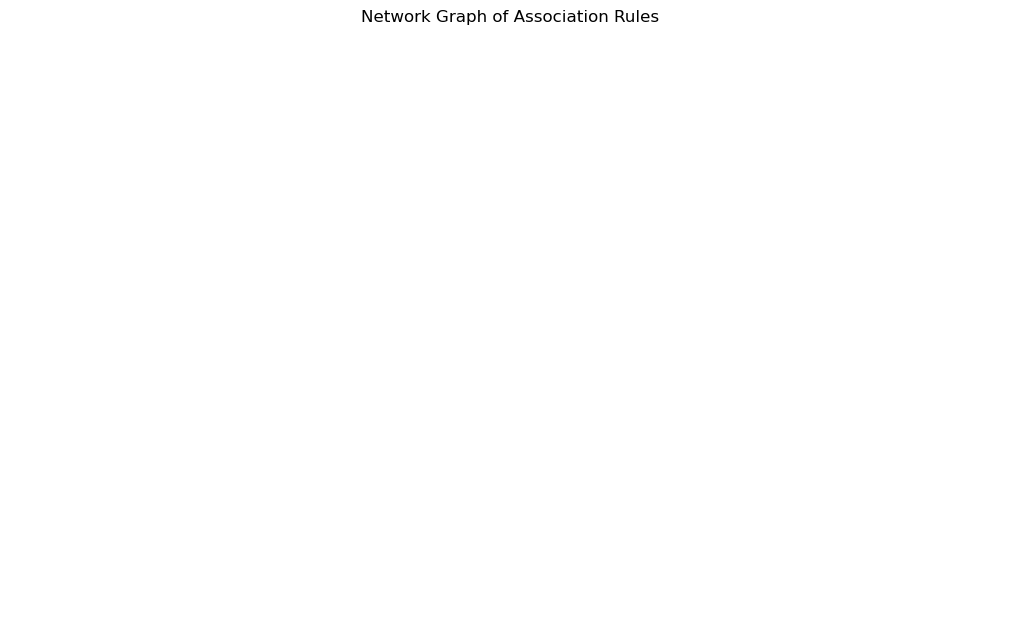

In [11]:
import networkx as nx

G = nx.DiGraph()

# Add edges to graph
for _, rule in rules.iterrows():
    for ante in rule["antecedents"]:
        for cons in rule["consequents"]:
            G.add_edge(ante, cons, weight=rule["lift"])

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=3000, font_size=10)
plt.title("Network Graph of Association Rules")
plt.show()
